# Clustering

**Context:**

Le client de ce projet est le propriétaire d'un centre commercial. Il souhaite savoir les typologies de clients qui achètent dans son magasin. Pour cela, il vous a founi un dataset très bien nettoyé Mall_Customers.csv et vous avez un jour pour apporter un réponse 

https://realpython.com/k-means-clustering-python/

# Preprocessing

## import

In [1]:
# import des librairie

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from operator import attrgetter
import matplotlib.colors as mcolors
from datetime import timedelta
import plotly.express as px
import squarify
import missingno as mno

In [2]:
# import des données
data = pd.read_csv("Mall_Customers.csv")
#data = data.drop("Unnamed: 0", axis=1)
#data = data.drop("customer_id", axis=1)
data

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

def des colonnes

## Fonctions

In [3]:
def missing_zero_values_table(df):
        '''Fonction pour regarder les valeurs manquantes'''
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        print(mno.matrix(df))
        return mz_table

In [4]:
def duplication(df):
    nb = df.duplicated().sum()
    dupli = df[df.duplicated()]
    return dupli

In [5]:
def boxplots(df, number):
    '''permet de ploter les differentes colonnes numerique en boxplot'''
    for col in number:
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()

In [6]:
def univar_repartition(df, col):
    '''etude de la repartition des variables'''
    for i in col:
        fig = px.histogram(data, x=i)
        fig.update_layout(bargap=0.2)
        fig.show()
       

In [7]:
def outlier_identificator(df,colonne):
    '''Identification des outlier methode quantile'''
    q1=np.quantile(df[colonne],0.25)
    q3=np.quantile(df[colonne],0.75)
    out= (q3+1.5*(q3-q1)) 
    outlier=df.loc[df[colonne]> out]
    outlier = outlier.sort_values(by=colonne, ascending = False)
    return outlier

## analyse des données

### verification du type des colonnes 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Valeurs manquante ?

Your selected dataframe has 5 columns and 200 Rows.
There are 0 columns that have missing values.
AxesSubplot(0.125,0.11;0.698618x0.77)


Empty DataFrame
Columns: [Zero Values, Missing Values, % of Total Values, Total Zero Missing Values, % Total Zero Missing Values, Data Type]
Index: []

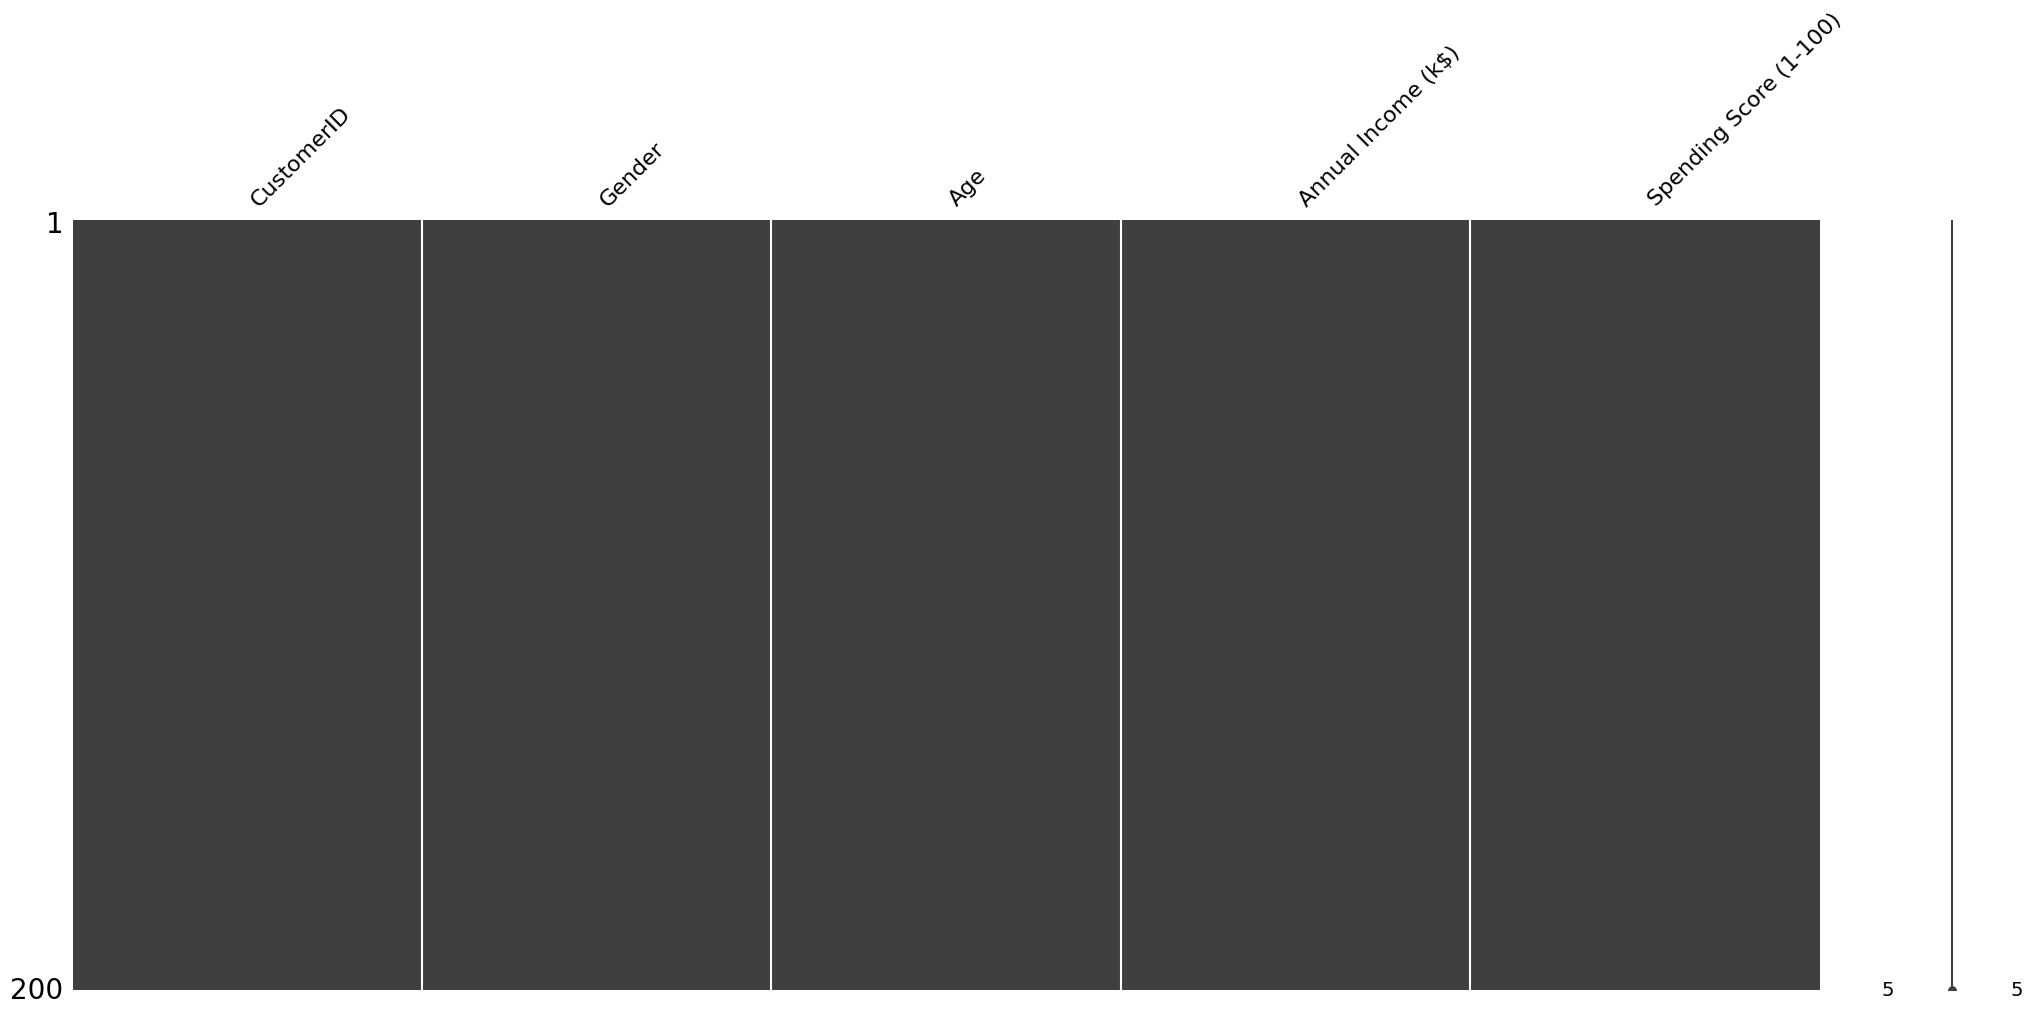

In [9]:
missing_zero_values_table(data)

### duplication ?

In [11]:
duplication(data)

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []

### valeur Abérente ? 

In [12]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
categ = ['Gender','Spending Score (1-100)']
num = ['Age','Annual Income (k$)']

In [14]:
numerical = data[['Age','Annual Income (k$)']]
numerical.describe()

Age  Annual Income (k$)
count  200.000000          200.000000
mean    38.850000           60.560000
std     13.969007           26.264721
min     18.000000           15.000000
25%     28.750000           41.500000
50%     36.000000           61.500000
75%     49.000000           78.000000
max     70.000000          137.000000

### outlier

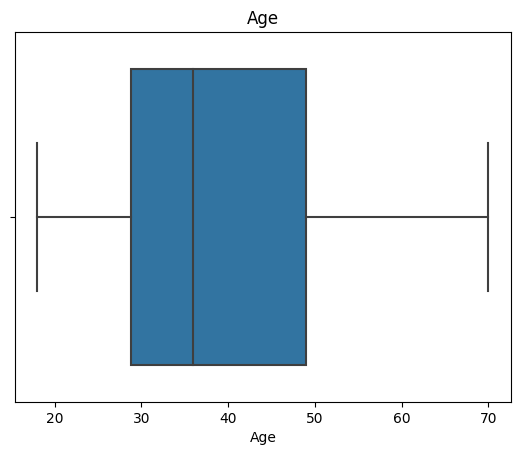

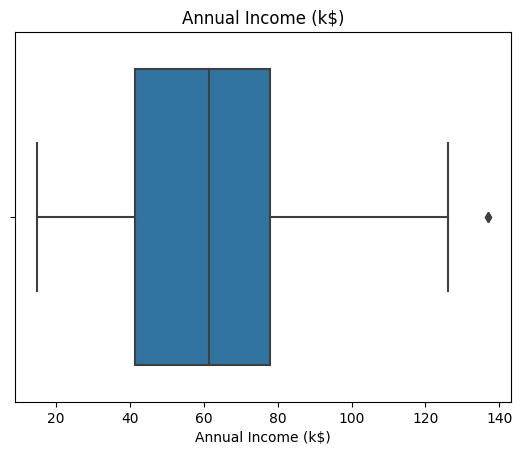

In [15]:
boxplots(data, num)

In [16]:
out = outlier_identificator(data,'Annual Income (k$)')
out

CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83

# Dataviz 

## Analyse univ

In [17]:
catego = data[['Gender','Spending Score (1-100)']]
for i in catego.columns :
    print("Pour",i,":")
    print("-----------")
    print(catego[i].value_counts())
    print("-----------")

Pour Gender :
-----------
Female    112
Male       88
Name: Gender, dtype: int64
-----------
Pour Spending Score (1-100) :
-----------
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64
-----------


In [18]:
univar_repartition(data, num)

In [19]:
univar_repartition(data, categ)

## Analyse multiv

In [20]:
fig = px.histogram(data, y='Annual Income (k$)', x = 'Age', histfunc='avg')
fig.update_layout(bargap=0.2)
fig.show()

In [33]:
fig = px.histogram(data, y='Annual Income (k$)', x = 'Age', color="Gender", histfunc='avg')
fig.update_layout(bargap=0.1)
fig.show()

In [35]:
fig = px.histogram(data, y='Spending Score (1-100)', x = 'Age')
fig.update_layout(bargap=0.2)
fig.show()

In [38]:
fig = px.histogram(data, x='Spending Score (1-100)', y = 'Gender', histfunc='avg')
fig.update_layout(bargap=0.2)
fig.show()

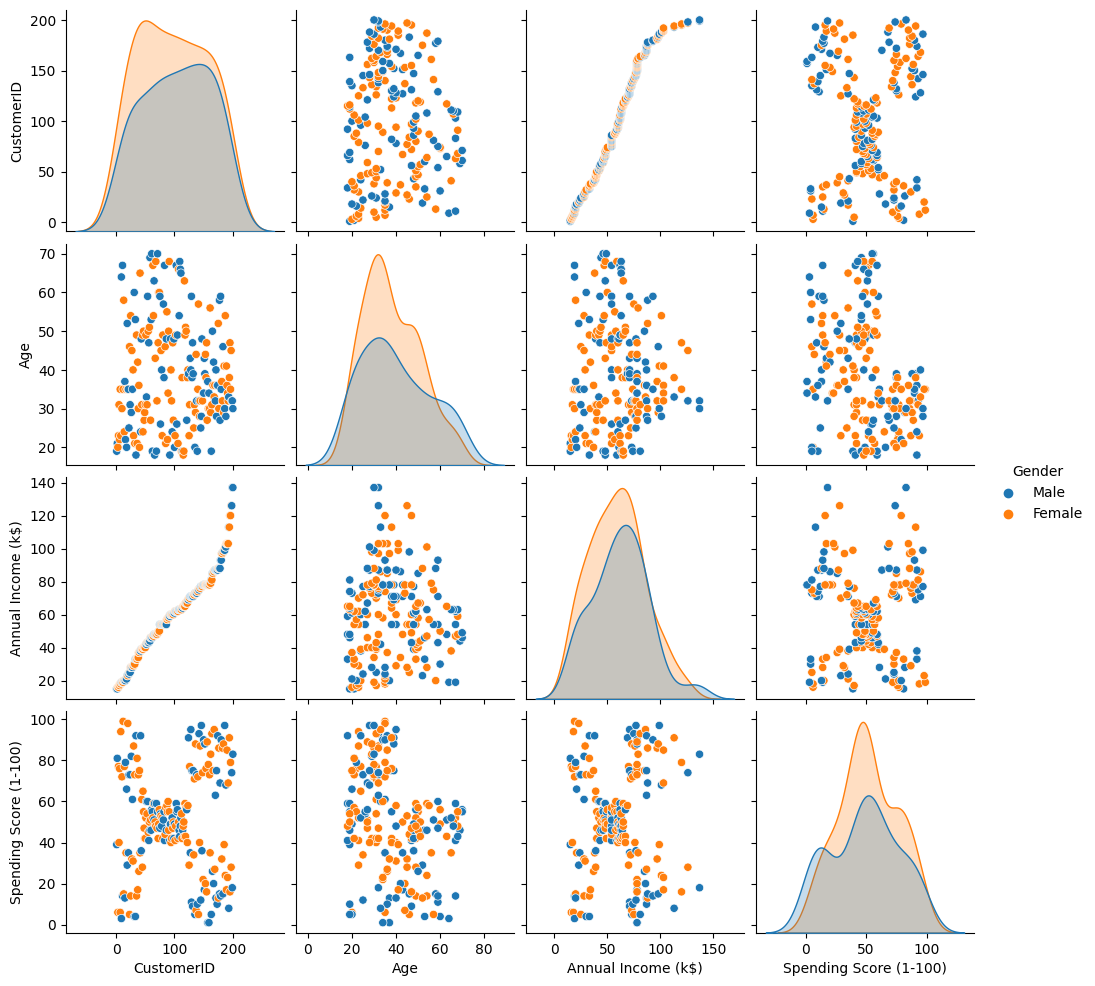

In [40]:
sns.pairplot(data,hue="Gender")

# Preparation des données pour le Clustering

In [21]:
df = data.copy()

## encoding

### label encoding

In [22]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

df.head(5)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40

## scalling

# Clustering

## K means clustering

In [23]:
from kneed import KneeLocator

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [42]:
cols = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[cols]

### Choix du nombre de cluster 

 **Elbow Method**

In [43]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

/home/alicia/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/alicia/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/alicia/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/alicia/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

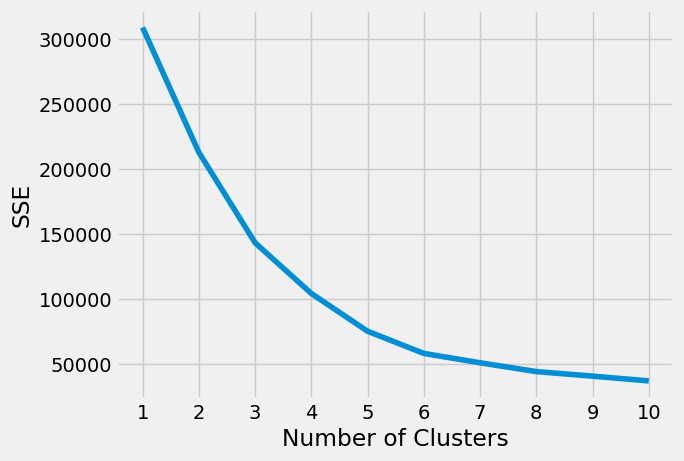

In [44]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [45]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

4

**silhouette method**

In [46]:
 # A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

/home/alicia/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/alicia/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/alicia/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/alicia/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

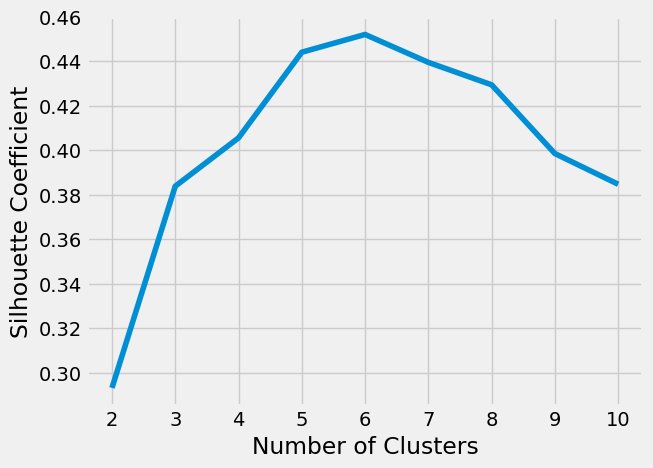

In [47]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Clustering

/home/alicia/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



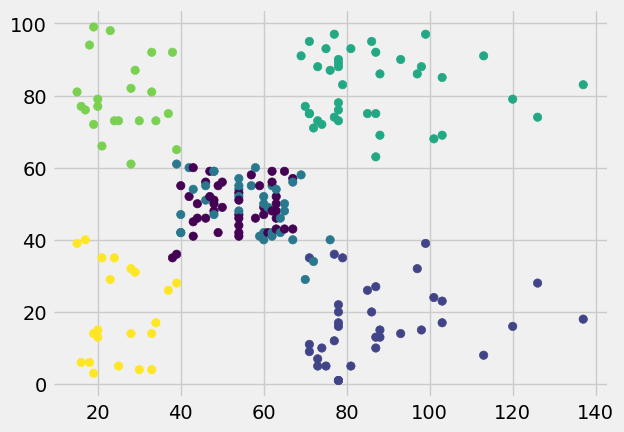

In [51]:
kmeans = KMeans(n_clusters = 6, max_iter = 1000)
labels = kmeans.fit_predict(X)
df['cluster'] = labels
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c = labels)

In [52]:
score = silhouette_score(X, kmeans.labels_)
score

0.45205475380756527

In [54]:
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       0   19                  15                      39   
1             2       0   21                  15                      81   
2             3       1   20                  16                       6   
3             4       1   23                  16                      77   
4             5       1   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196       1   35                 120                      79   
196         197       1   45                 126                      28   
197         198       0   32                 126                      74   
198         199       0   32                 137                      18   
199         200       0   30                 137                      83   

     cluster  
0          5  
1          4  
2          5  
3          4  
4          5  
..       ...  
195        3  
196        1  
197        3  
198        1  
199        3  

[200 rows x 6 columns]

/home/alicia/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


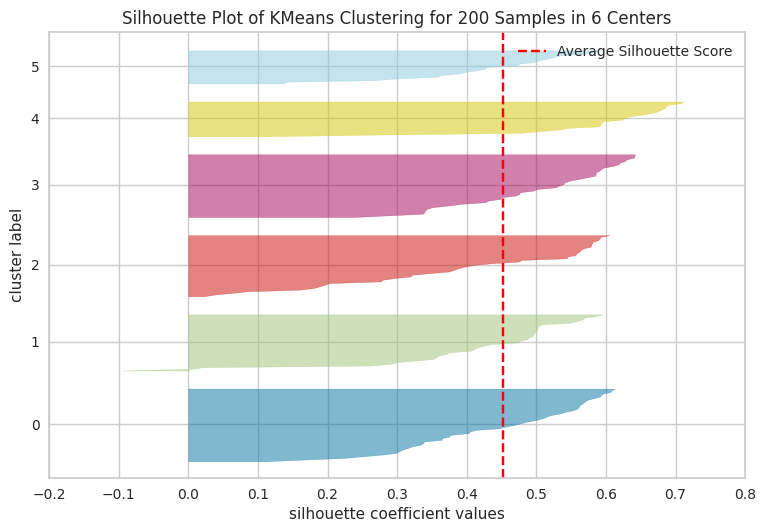

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [81]:
# Tracer le diagramme de silhouette
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

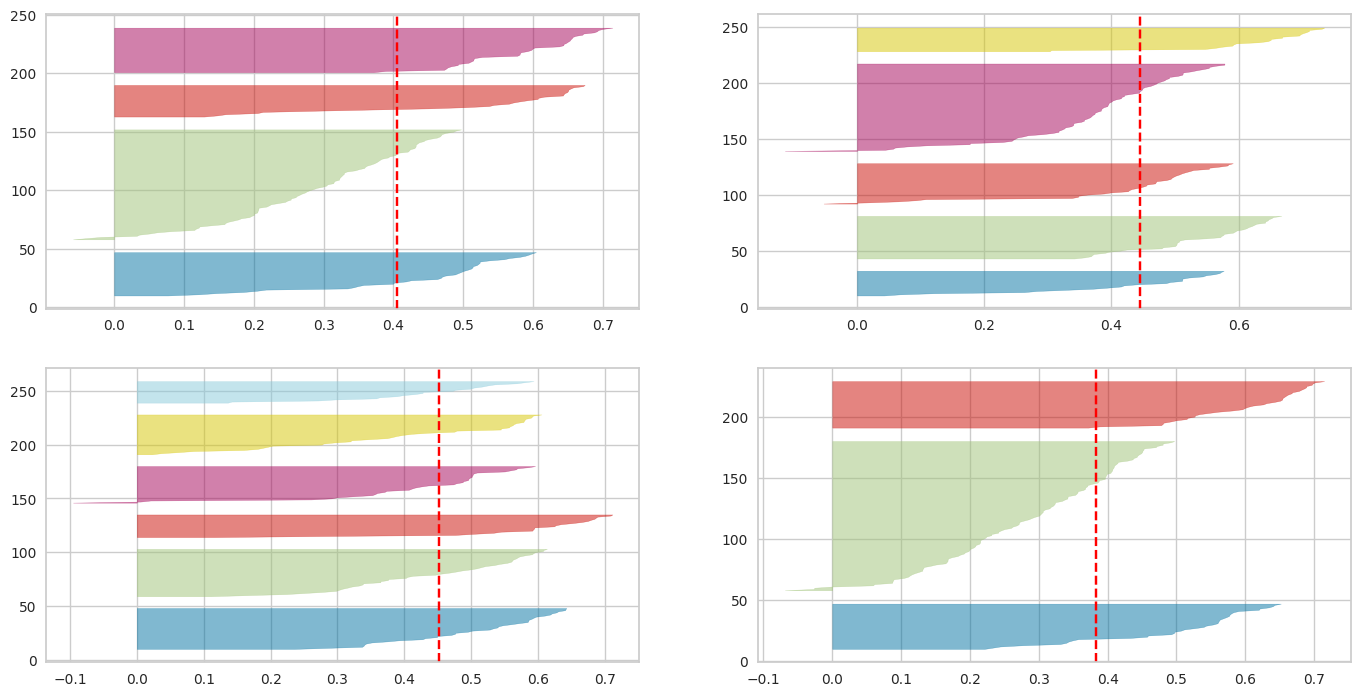

In [89]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [3, 4, 5, 6]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-2][mod])
    visualizer.fit(X) 

## Kmenoids clustering

### tentative 1 

In [90]:
df_2 = df.copy()
df_2 = df_2.drop(['CustomerID'], axis=1)

In [91]:
# — — — — — — -Importing Packages — — — — — — — — — — — -
import matplotlib.pyplot as plt
import numpy as np
from sklearn_extra.cluster import KMedoids

In [138]:
# — — — — — — -Fit KMedoids clustering — — — — — — — — — — — -
KMobj = KMedoids(n_clusters=5).fit(df_2)
# — — — — — — -Assigning Cluster Labels — — — — — — — — — — — -
labels = KMobj.labels_

In [139]:
# — — — — — — -Extracting Unique Labels — — — — — — — — — — — -
unq_lab = set(labels)
unq_lab

{0, 1, 2, 3, 4}

In [140]:
# — — — — — — -Setting Up Color Codes — — — — — — — — — — — -
colors_plot = [
 plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unq_lab))
]
for k, col in zip(unq_lab, colors_plot):
    class_member_mask = labels == k

In [141]:
 # — — — — — — -Setting datapoint Feature X and Feature Y — — — — — — — — — — — -
XY = df_2[class_member_mask]
XY.head(5)

Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
40       1   65                  38                      35        0
42       0   48                  39                      36        0
46       1   50                  40                      55        0
50       1   49                  42                      52        0
53       0   59                  43                      60        0

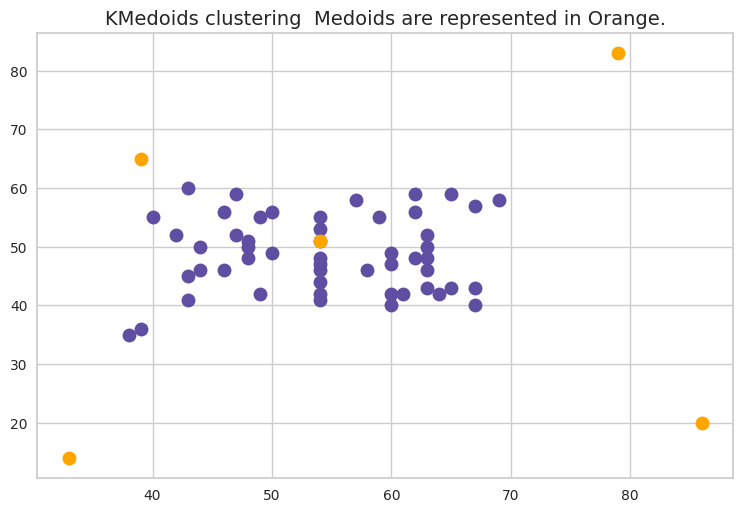

In [159]:
# — — — — — — -Plotting Feature X and Feature Y for each cluster labels — — — — — — — — — — — -
plt.plot(XY.iloc[:, 2],XY.iloc[:, 3],'o',markerfacecolor=tuple(col),markeredgecolor='white',markersize=10)
# — — — — — — -Annotate Centroids — — — — — — — — — — — -
plt.plot(KMobj.cluster_centers_[:, 2],KMobj.cluster_centers_[:, 3],'o',markerfacecolor='orange',markeredgecolor='k',markersize=10)
# — — — — — — -Add title to the plot — — — — — — — — — — —
plt.title('KMedoids clustering  Medoids are represented in Orange.', fontsize=14);

In [160]:
score = silhouette_score(df_2, KMobj.labels_)
score

0.42278832393766763

### Tentative 2

In [102]:
df_3 = df.copy()
df_3 = df_3.drop(['CustomerID'], axis=1)

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

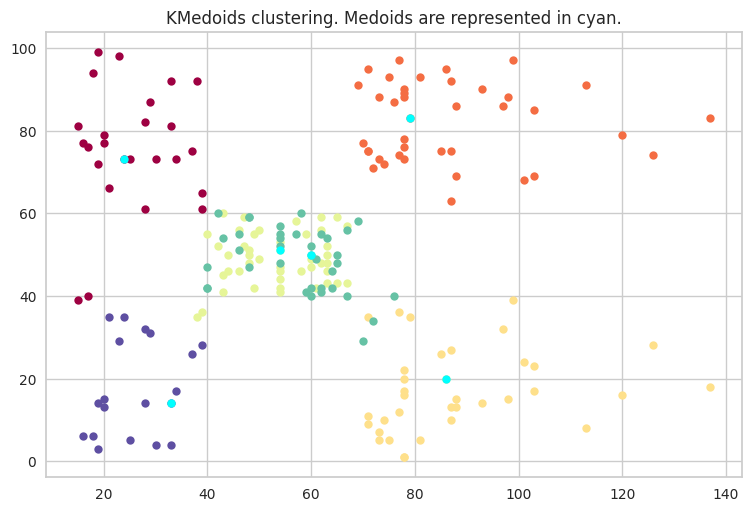

In [111]:
from sklearn_extra.cluster import KMedoids


print(__doc__)

# #############################################################################
# Compute Kmedoids clustering
cobj = KMedoids(n_clusters=6).fit(df_3)
labels = cobj.labels_
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]

for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = df_3[class_member_mask]
    plt.plot(
        xy.iloc[:, 2],
        xy.iloc[:, 3],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    cobj.cluster_centers_[:, 2],
    cobj.cluster_centers_[:, 3],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

In [112]:
score = silhouette_score(df_3, cobj.labels_)
score

0.4462312744831184